In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset

In [2]:
dataframe=pd.read_csv("heart.csv")

# Length and head of the dataset

In [3]:
print(dataframe.shape)
dataframe.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory data analysis

# Let's find missing values

In [4]:
dataframe.isnull().sum()
dataframe["age"].value_counts()
dataframe["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


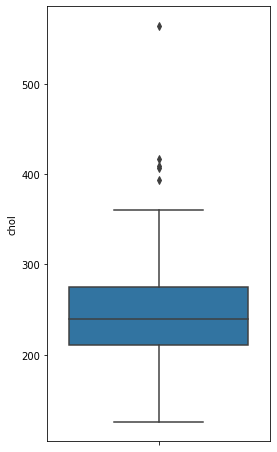

In [6]:
# Let's take a chol for analysis here
plt.figure(figsize=(4,8))
sns.boxplot(y=dataframe.chol)

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.
It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.


# Inter-Quartile Range Method

Let's define a function to find out the IQR, lower and the upper whisker.¶


In [7]:
def outlier(dataframe, column):
    global lower, upper
    q25=np.quantile(dataframe[column], 0.25)
    q75=np.quantile(dataframe[column], 0.75)
    #calculate the IQR
    iqr=q75-q25
    # calculate the outlier cutoff
    cutoff=iqr * 1.5
    # calculate the lower and upper bound value
    lower=q25-cutoff
    upper=q75+cutoff
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1=dataframe[dataframe[column]>upper]
    df2 = dataframe[dataframe[column] < lower]
    return print("The total number of outliers are", df1.shape[0]+df2.shape[0])
    
    
    
    

In [8]:
outlier(dataframe,"chol")

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
The total number of outliers are 5


# Visualization

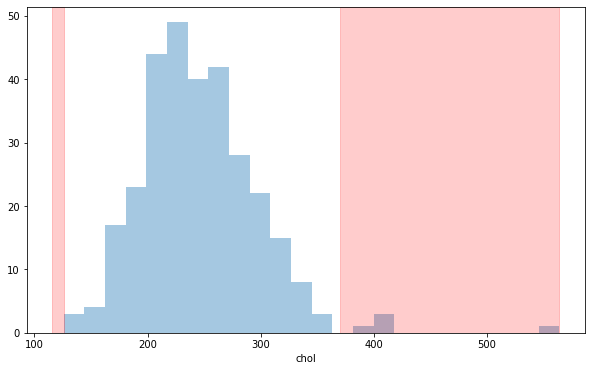

In [9]:
plt.figure(figsize = (10,6))
sns.distplot(dataframe.chol, kde=False)
plt.axvspan(xmin = lower,xmax= dataframe.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= dataframe.chol.max(),alpha=0.2, color='red')


Here the red zone represents the outlier zone! The records present in that zone are considered as outliers¶
Remove the records which are above the upper bound value and records below the lower bound value!¶



In [10]:
#Data Frame without outliers
df_new = dataframe[(dataframe['chol'] < upper) | (dataframe['chol'] > lower)]
df_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Standard Deviation

In [11]:
df=pd.read_csv("StudentsPerformance.csv")

In [12]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
# Let's consider the variable writing score for analysis

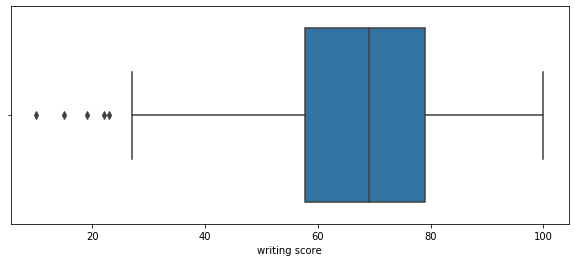

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(df["writing score"])

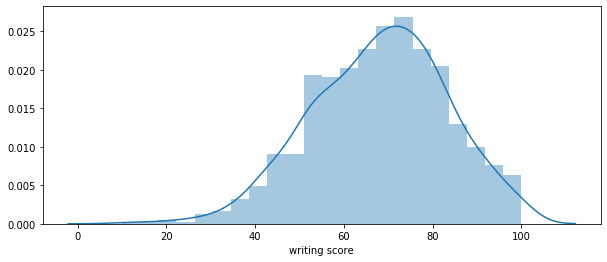

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(df["writing score"])

In [17]:
# Let's define a function to find out the lower and the upper whisker using SDM:¶

In [18]:
def outlier1(df, column):
    global lower, upper
    # calculate the mean and standard deviation of the data frame
    data_mean=df[column].mean()
    data_sd=df[column].std()
    # calculate the cutoff value
    cut_off=data_sd*3
    # calculate the lower and upper bound value
    lower=data_mean-cut_off
    upper=data_mean+cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1=df[df[column]>upper]
    df2=df[df[column]<lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
        

In [19]:
outlier1(df, "writing score")

The lower bound value is 22.467028967391073
The upper bound value is 113.64097103260893
Total number of outliers are 4


# Visual Representation:¶

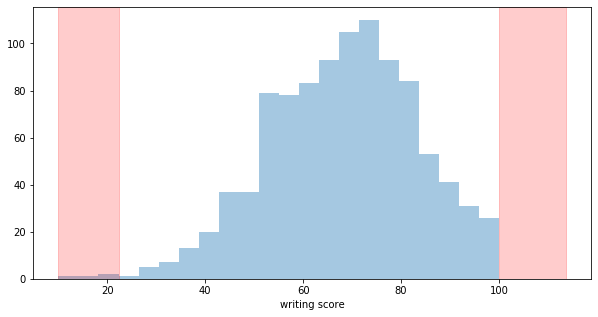

In [20]:
plt.figure(figsize = (10,5))
sns.distplot(df['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['writing score'].max(),alpha=0.2, color='red')

# Outlier Detection using Z-Score

In [21]:
# The condition is absolute(z-score)>threshold-value(2.5,3,3.5)
insurance=pd.read_csv("insurance.csv")

In [22]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
# Explarotary data analysis
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

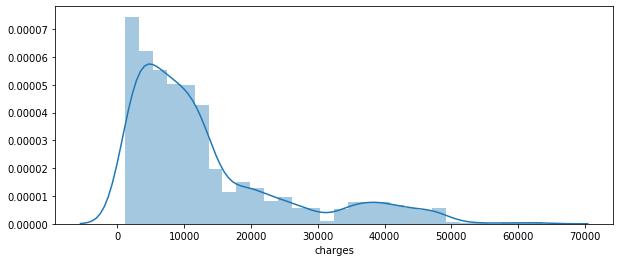

In [26]:
plt.figure(figsize=(10,4))
sns.distplot(insurance["charges"])

In [27]:
# Let's define a function to find out the lower and the upper whisker using Z-Score method:¶

In [28]:
def outlier(data):
    global zscore, outliers
    zscore=[]
    outliers=[]
    threshold=3
    mean=np.mean(data)
    sd=np.std(data)
    for i in data:
        z_score=(i-mean)/sd
        zscore.append(z_score)
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return print("The number of outliers are", len(outliers))     
            
        

In [31]:
outlier(insurance.charges)

The number of outliers are 7


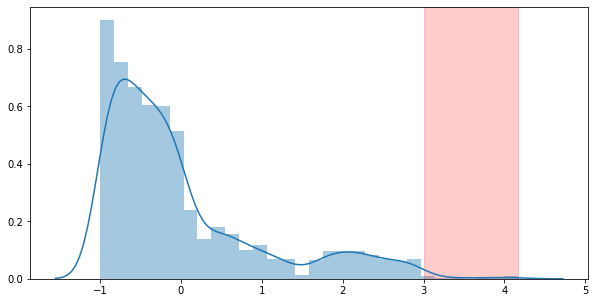

In [34]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin=3, xmax=max(zscore),alpha=0.2, color="red")

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

In [35]:
def outlier1(data):
    global zscore, outliers
    outliers=[]
    zscore=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        zscore.append(z_score)
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return print("The number of outliers are", len(outliers))

        

In [36]:
outlier1(insurance.charges)

The number of outliers are 7


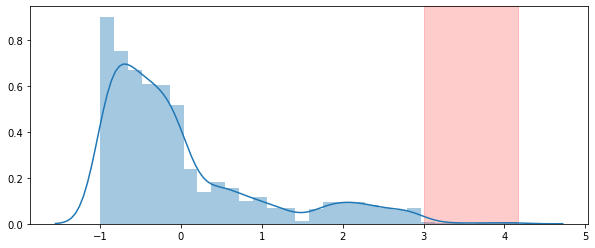

In [39]:
plt.figure(figsize=(10,4))
sns.distplot(zscore)
plt.axvspan(xmin=3, xmax=max(zscore), alpha=0.2, color="red")

# The advance outlier detection technique
# Isolation forest algorithm

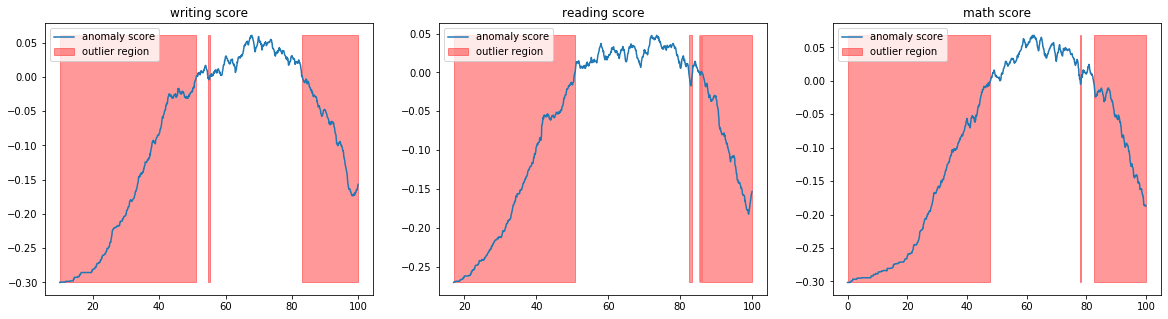

In [43]:
# import the library
from sklearn.ensemble import IsolationForest
# The required columns
cols = ['writing score','reading score','math score']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs=axs.ravel()
for i, column in enumerate(cols):
    isolation_forest=IsolationForest(contamination="auto")
    isolation_forest.fit(df[column].values.reshape(-1,1))
    x=np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anamoly_score=isolation_forest.decision_function(x)
    outlier=isolation_forest.predict(x)
    axs[i].plot(x, anamoly_score, label='anomaly score')
    axs[i].fill_between(x.T[0], np.min(anamoly_score), np.max(anamoly_score), where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)
